<a href="https://colab.research.google.com/github/Khoa22213131/AIO-2024_HOMEWORK/blob/feature%2Fmodule_03%2Fweek_05%2Fproject/M03W05_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:02<00:00, 30.1MB/s]


In [ ]:
# Load dataset
import pandas as pd
df = pd. read_csv ('./IMDB-Dataset.csv')
# Remove duplicate rows
df = df. drop_duplicates ()

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

nltk.download('stopwords')
nltk.download('wordnet')
stop = set(stopwords.words('english'))
# Expanding contractions


def expand_contractions(text):

    return contractions.fix(text)

# Function to clean data


def preprocess_text(text):
    wl = WordNetLemmatizer()
    # Removing html tagtext = soup.get_text ()
    soup = BeautifulSoup(text, "html.parser")
    # Expanding chatwords and contracts clearing
    text = expand_contractions(text)
    contractions
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\ S)', '. ', text)  # add space after full stop
    text = re.sub(r'http \S+', '', text)  # remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ])  # remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word .
        isalpha()])  # lemmatize
    return text


df['review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-10-d06bfc67c5aa>:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


ValueError: Invalid format specifier

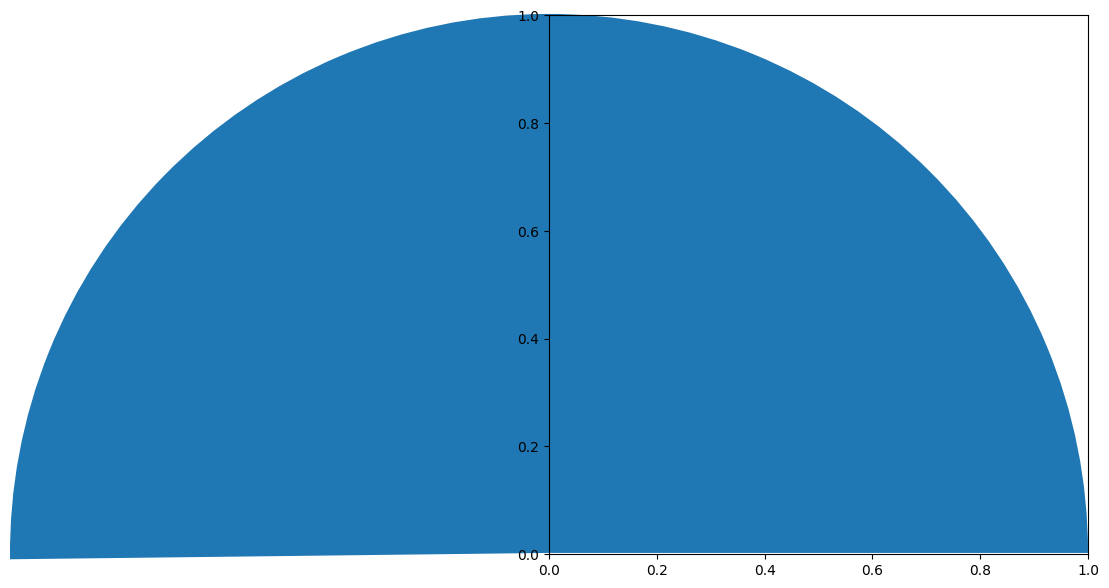

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Creating autocpt arguments
def func (pct , allvalues ) :
  absolute = int( pct / 100.* np.sum( allvalues ) )
  return " {:.1 f}%\ n({:d})". format (pct , absolute )
freq_pos = len(df[df['sentiment'] =='positive'])
freq_neg = len(df[df['sentiment'] =='negative'])
data = [ freq_pos , freq_neg ]
labels = ['positive','negative']
# Create pie chart
pie , ax = plt.subplots ( figsize =[11 ,7])
plt.pie(x=data , autopct = lambda pct: func (pct , data ) , explode =[0.0025]*2 ,
        pctdistance =0.5 , colors =[ sns.color_palette () [0] ,'tab:red'] , textprops ={'fontsize': 16})
# plt.title (' Frequencies of sentiment labels', fontsize =14 , fontweight =' bold')
labels = [r'Positive', r'Negative']
plt.legend (labels , loc ="best", prop ={'size': 14})
pie.savefig ("PieChart.png")
plt.show ()

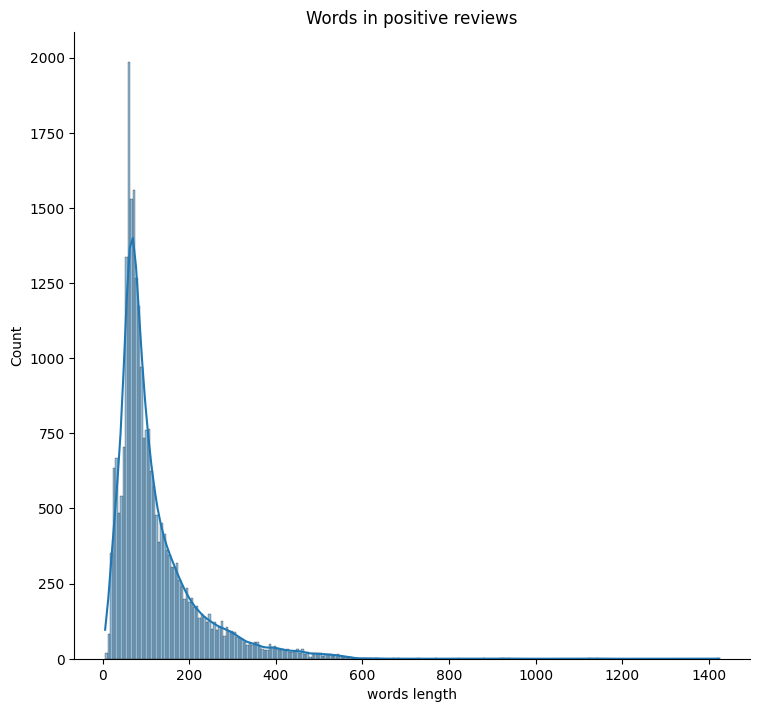

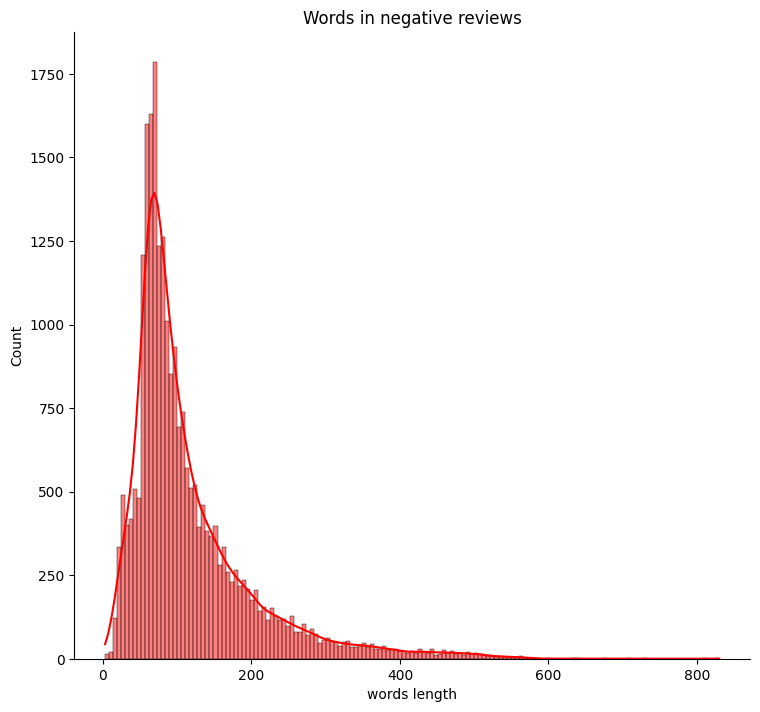

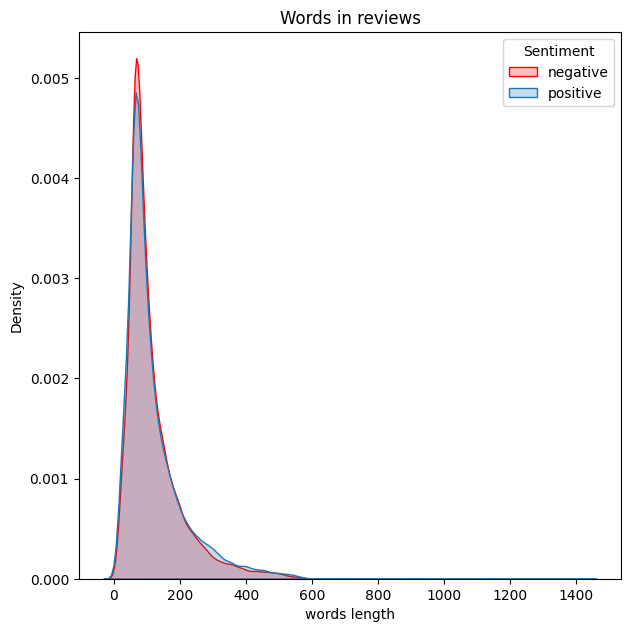

In [ ]:
# Calculate the length of words in each review
words_len = df['review'].str.split().map(lambda x: len(x))

# Copy the DataFrame and add a new column for word length
df_temp = df.copy()
df_temp['words length'] = words_len

# Plot distribution of word lengths for positive reviews
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')

plt.show(hist_positive)

# Plot distribution of word lengths for negative reviews
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')

plt.show(hist_negative)

# Plot combined kernel density estimation (KDE) for word lengths in both positive and negative reviews
plt.figure(figsize=(7,7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')

plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)


In [ ]:
from sklearn . model_selection import train_test_split
from sklearn . feature_extraction . text import TfidfVectorizer
from sklearn . preprocessing import LabelEncoder
label_encode = LabelEncoder()
x_data = df['review']
# vectorizer = TfidfVectorizer()
# x_data = vectorizer.fit_transform(x_data)
y_data = label_encode . fit_transform (df['sentiment'])
x_train , x_test , y_train , y_test = train_test_split (
x_data , y_data , test_size =0.2 , random_state =42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer ( max_features =10000)
tfidf_vectorizer.fit ( x_train , y_train )
x_train_encoded = tfidf_vectorizer . transform ( x_train )
x_test_encoded = tfidf_vectorizer . transform ( x_test )

In [ ]:
from sklearn . tree import DecisionTreeClassifier
from sklearn . ensemble import RandomForestClassifier
from sklearn . metrics import accuracy_score
dt_classifier = DecisionTreeClassifier (
criterion ='entropy',
random_state =42
)
dt_classifier . fit( x_train_encoded , y_train )
y_pred = dt_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

0.7111021478269638

In [ ]:
rf_classifier = RandomForestClassifier (
random_state =42
)
rf_classifier . fit( x_train_encoded , y_train )
y_pred = rf_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

0.835635776948674